# Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset

In [2]:
df = pd.read_csv("C:/Users/98939/Downloads/MASTER_DATASET.csv")

# Choose a numeric column to analyze

In [6]:
# Select the column you want to test for gross errors
# Make sure it's numeric
column = "Temperature_In"  # Replace with 'pressure' , ...
data = df[column].dropna().values  # Drop NaNs if any

# Grubbs' Test

In [7]:
# Function to perform iterative Grubbs' test for outlier detection
def grubbs_test(data, alpha=0.05):
    """
    Perform iterative Grubbs' Test to identify outliers.
    Parameters:
        data: 1D array-like, the input numeric data
        alpha: significance level
    Returns:
        mask: boolean array where True means normal, False means outlier
    """
    data = data.copy()
    mask = np.ones(len(data), dtype=bool)

    while True:
        current_data = data[mask]
        n = len(current_data)
        if n < 3:
            break

        mean = np.mean(current_data)
        std = np.std(current_data, ddof=1)
        abs_diffs = np.abs(current_data - mean)
        max_idx = np.argmax(abs_diffs)
        G_calculated = abs_diffs[max_idx] / std

        # Grubbs' critical value
        t_crit = stats.t.ppf(1 - alpha / (2 * n), df=n - 2)
        G_critical = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

        if G_calculated > G_critical:
            # Mark this index as outlier
            true_idx = np.where(mask)[0][max_idx]
            mask[true_idx] = False
        else:
            break

    return mask

# Apply Grubbs' Test and label outliers

In [8]:
# Apply the Grubbs' Test
mask = grubbs_test(data, alpha=0.05)

# Create a new column for outlier flag
df["Grubbs_Outlier"] = True
df.loc[df[column].dropna().index[mask], "Grubbs_Outlier"] = False

# How many outliers detected
print(f"Detected {(~mask).sum()} gross errors out of {len(data)} values.")

Detected 0 gross errors out of 100000 values.


# Visualize outliers

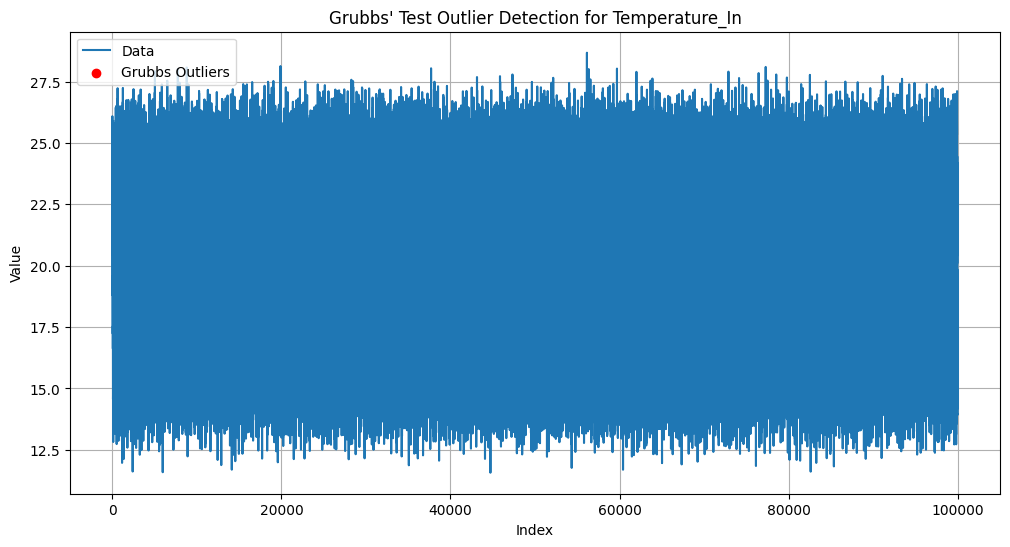

In [9]:
# Visualize original data and outliers
plt.figure(figsize=(12, 6))
plt.plot(data, label="Data")
plt.scatter(np.where(~mask)[0], data[~mask], color="red", label="Grubbs Outliers")
plt.title(f"Grubbs' Test Outlier Detection for {column}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()